In [90]:
import os
import subprocess
import sys
import requests
import datetime
import pandas as pd

In [240]:
# Load data into dataframe variables from local and remote data sources
fb = pd.read_csv("https://mpt-public.s3-us-west-2.amazonaws.com/data/FB.csv")
appl = pd.read_json("https://mpt-public.s3-us-west-2.amazonaws.com/data/AAPL.json")
csco = pd.read_csv("data/CSCO.csv", index_col=0, parse_dates=True)
msft = pd.read_csv("data/MSFT.csv", index_col=0, parse_dates=True)

In [193]:
# show the first n rows
fb.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,150.100006,150.190002,147.440002,148.679993,148.679993,15971200
1,2018-11-06,149.309998,150.970001,148.000000,149.940002,149.940002,16667100


In [139]:
# show the last 5 rows
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2019-10-28,144.399994,145.669998,143.509995,144.190002,144.190002,35280100
246,2019-10-29,144.080002,144.500000,142.649994,142.830002,142.830002,20519700
247,2019-10-30,143.520004,145.000000,142.789993,144.610001,144.610001,18471700
248,2019-10-31,144.899994,144.929993,142.990005,143.369995,143.369995,2459620000
249,2019-11-01,144.259995,144.419998,142.970001,143.720001,143.720001,33119200


In [150]:
# shows a quick statistic summary 
appl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,193.418720,195.378960,191.559760,193.544720,192.475180,4.483257e+07
std,23.327328,23.385420,23.374523,23.442953,23.984513,2.183000e+08
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.737499,175.902496,173.362499,174.757499,173.279304,2.172442e+07
50%,196.364998,198.750000,193.805000,196.345001,195.165612,2.779805e+07
75%,207.449997,209.089996,205.104996,207.675003,206.497501,3.654298e+07
max,249.539993,255.929993,249.160004,255.820007,255.820007,3.476660e+09


In [40]:
# transposing selected data:
csco.head(5).T

,0,1,2,3,4
Date,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09
Open,45.74,46.04,46.98,47.87,48.08
High,46.44,46.62,47.93,48.44,48.25
Low,45.35,46,46.75,47.87,46.7
Close,46.14,46.5,47.9,48.44,47.11
Adj Close,44.8722,45.2223,46.5839,47.109,45.8156
Volume,17525200,15446700,19990400,21002000,22015400


In [43]:
# selecting column by name or index
appl[["Open", "Close"]]

,Open,Close
0,204.300003,201.589996
1,201.919998,203.770004
2,205.970001,209.949997
3,209.979996,208.490005
4,205.550003,204.470001
...,...,...
245,247.419998,249.050003
246,248.970001,243.289993
247,244.759995,243.259995
248,247.240005,248.759995


In [209]:
# selecting rows
appl[5:10]

,Date,Open,High,Low,Close,Adj Close,Volume
5,2018-11-12,199.000000,199.850006,193.789993,194.169998,191.870087,51135500
6,2018-11-13,191.630005,197.179993,191.449997,192.229996,189.953079,46882900
7,2018-11-14,193.899994,194.479996,185.929993,186.800003,184.587402,60801000
8,2018-11-15,188.389999,191.970001,186.899994,191.410004,189.142792,46478800
9,2018-11-16,190.500000,194.970001,189.460007,193.529999,191.237686,36928300


In [48]:
# selecting rows and columns
appl.loc[[1,3,5], ["Open","Close"]]

,Open,Close
1,201.919998,203.770004
3,209.979996,208.490005
5,199.000000,194.169998


In [164]:
# selection by conditions
appl[(appl.Open > 240.0) & (appl['Volume'] > 30000000)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-29,248.970001,249.750000,242.570007,243.289993,243.289993,35660100
2019-10-30,244.759995,245.300003,241.210007,243.259995,243.259995,30950600
2019-10-31,247.240005,249.169998,237.259995,248.759995,248.759995,3476660000
2019-11-01,249.539993,255.929993,249.160004,255.820007,255.820007,37738700


In [251]:
# create a year and month columns for aggregation
# csco and msft were loaded as time series, therefore can easily create new column from the date index column
csco['Year'] = csco.index.year
csco['Month'] = csco.index.month

In [226]:
# show the year and month columns
csco.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2018-11-05,45.740002,46.439999,45.349998,46.139999,44.872234,17525200,2018,11
2018-11-06,46.040001,46.619999,46.000000,46.500000,45.222347,15446700,2018,11
2018-11-07,46.980000,47.930000,46.750000,47.900002,46.583874,19990400,2018,11
2018-11-08,47.869999,48.439999,47.869999,48.439999,47.109035,21002000,2018,11
2018-11-09,48.080002,48.250000,46.700001,47.110001,45.815578,22015400,2018,11


In [252]:
# compute average by year and month
csco.groupby(["Year", "Month"]).mean()

Open       High        Low      Close  Adj Close  \
Year Month                                                          
2018 11     46.210526  46.743158  45.632632  46.217895  44.947988   
     12     45.215263  45.748948  44.304737  44.898947  43.665281   
2019 1      44.180952  44.671905  43.862857  44.375238  43.474709   
     2      48.664210  49.124737  48.398421  48.855263  47.880775   
     3      52.515714  52.960476  52.146190  52.557619  51.509282   
     4      55.858095  56.226191  55.580000  55.954762  55.136849   
     5      54.101364  54.633181  53.612273  54.126363  53.382595   
     6      55.736500  56.232000  55.213500  55.672000  54.906993   
     7      56.895000  57.278182  56.480909  56.870000  56.411223   
     8      49.988637  50.426364  49.208636  49.702273  49.328653   
     9      49.091500  49.455000  48.615500  49.079500  48.710561   
     10     47.109565  47.411305  46.607826  46.970000  46.939180   
     11     46.849998  47.490002  46.639999  47.029999  47.029999   

                  Volume  
Year Month                
2018 11     2.508514e+07  
     12     3.193346e+07  
2019 1      2.108378e+07  
     2      2.244324e+07  
     3      2.060742e+07  
     4      1.664955e+07  
     5      2.340007e+07  
     6      2.679561e+07  
     7      1.481194e+07  
     8      2.316787e+07  
     9      1.845360e+07  
     10     7.120642e+07  
     11     2.440260e+07

In [253]:
# compute max by year and month
csco.groupby(["Year", "Month"]).max()

Open       High        Low      Close  Adj Close      Volume
Year Month                                                                   
2018 11     48.080002  48.439999  47.869999  48.439999  47.109035    45983300
     12     48.700001  49.139999  48.080002  48.740002  47.400795    77915100
2019 1      46.720001  47.380001  46.520000  47.290001  46.346737    29606700
     2      51.549999  51.959999  51.349998  51.770000  50.737373    47598600
     3      53.910000  54.230000  53.360001  53.990002  52.913094    43670700
     4      57.180000  57.529999  56.610001  56.950001  56.167431    26093600
     5      56.680000  56.830002  56.130001  56.520000  55.743340    46057800
     6      57.410000  58.150002  56.980000  57.410000  56.621113   103123400
     7      58.130001  58.259998  57.869999  58.049999  57.613628    28410000
     8      55.840000  56.889999  55.160000  55.389999  54.973625    61129100
     9      50.279999  50.299999  49.790001  50.029999  49.653915    48301300
     10     49.650002  49.869999  47.400002  47.770000  47.770000  1246390000
     11     46.849998  47.490002  46.639999  47.029999  47.029999    24402600

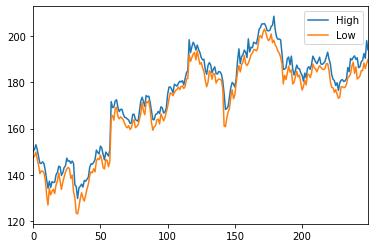

In [261]:
# show the high and low line chart
lines = fb[['High','Low']].plot.line()